## Regresja wielu zmiennych

Będziemy tworzyli model regresji liniowej dla cen mieszkań w Poznaniu. Zestaw danych to 5000 aktualnych opisów z serwisu _gratka.pl_.


### Dane

Plik `gratkapl.csv` zawiera dane, na których należy zbudować model regresyjny.
Pierwszy wiersz w pliku to nagłówek zawierający opisy kolumn.

* Id - numer porządkowy oferty
* Expected - cena mieszkania
* Rooms - liczba pokoi
* SqrMeters - metraż mieszkania w $m^2$
* Floor - piętro
* Location - dzielnica lub adres w Poznaniu
* Description - fragment opisu mieszkania

#### Zadanie 1

Zaimplementuj poznane metryki: MAE, MSE oraz RMSE, a następnie porównaj poprawność swoich funkcji z tymi dostępnymi w bibliotece scikit-learn.
Dla przypomnienia:

$$\begin{array}{rll} MAE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} \left|y_i  - \hat{y_i}\right|
\end{array} $$

$$\begin{array}{rll} MSE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2
\end{array} $$

$$\begin{array}{rll} RMSE &=& \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2}
\end{array} $$

In [1]:
import numpy as np

In [2]:
def mae(y_true, y_pred):
    n = y_true.size
    return sum(np.abs(y_true - y_pred)) / n

In [3]:
def mse(y_true, y_pred):
    n = y_true.size
    return sum((y_true - y_pred) ** 2) / n

In [4]:
from math import sqrt

def rmse(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y = np.array([100, 103, 30, 28])
pred_y = np.array([92, 112, 19, 42])

assert mae(y, pred_y) == mean_absolute_error(y, pred_y)
assert mse(y, pred_y) == mean_squared_error(y, pred_y)
assert rmse(y, pred_y) == mean_squared_error(y, pred_y, squared=False)

#### Zadanie 2

Dla pierwszych 500 mieszkań stwórz wykres złożony z trzech umieszczonych obok siebie wykresów punktowych ilustrujących po kolei korelację cech liczby pokoi, metrażu i piętra mieszkania z ceną mieszkań. Zadbaj o poprawne tytuły na osiach. Opisz wnioski.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv("data/gratkapl.csv", encoding='unicode_escape')
df.head()

,Id,Expected,Rooms,SqrMeters,Floor,Location,Description
0,1,269000,3,55.00,1,PoznaÅ Zawady,Przedmiotem sprzedaÅ¼y jest mieszkanie poÅoÅ¼...
1,2,320000,3,79.00,10,PoznaÅ Rataje ul. OrÅa Bialego,Na sprzedaÅ¼ duÅ¼e sÅoneczne mieszkanie 3-pok...
2,3,146000,1,31.21,1,PoznaÅ Nowe Miasto ul. Kawalerka W Nowym Blok...,GorÄ co zachÄcam do zapoznania siÄ z ofertÄ ...
3,4,189000,2,44.00,2,PoznaÅ Grunwald Ogrody JeÅ¼yce Centrum Åazar...,BEZPIECZNA TRANSAKCJA JEDYNIE Z DOÅWIADCZONYM...
4,5,480240,2,65.25,1,PoznaÅ ul. Droga DÄbiÅska 19,NieruchomoÅci Mieszkania NieruchomoÅci Miesz...


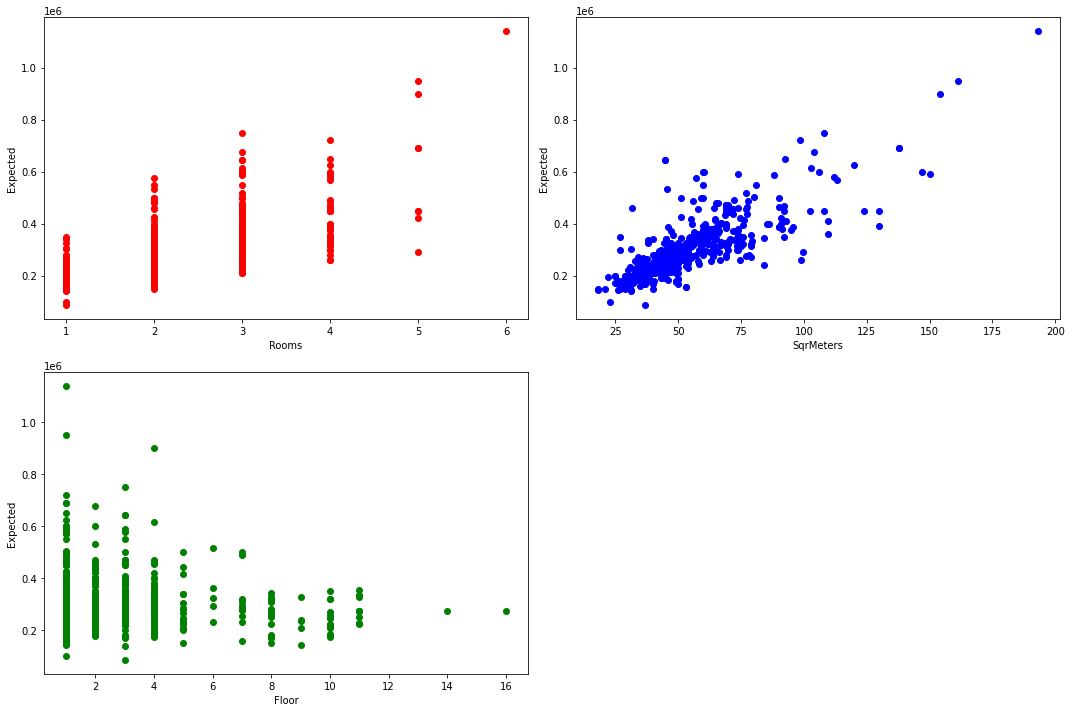

In [9]:
def plot_points(ax, dataframe, x_label, y_label, color):
    ax.scatter(x=dataframe[x_label], y=dataframe[y_label], c=color)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plot_points(axs[0, 0], df.head(500), "Rooms", "Expected", "red")
plot_points(axs[0, 1], df.head(500), "SqrMeters", "Expected", "blue")
plot_points(axs[1, 0], df.head(500), "Floor", "Expected", "green")
axs[1, 1].set_visible(False)
fig.tight_layout()

Największe zróżnicowanie pomiędzy liczbą pokoi, a ceną występuje w przypadku mieszkań dwu- i trzypokojowych, a najmniejszy - dla sześciopokojowych. Generalnie widzimy wzrost ceny mieszkania wraz ze wzrostem liczby pokoi.

Wraz ze wzrostem metrażu mieszkania, rośnie też jego cena. Zależność bez wątpienia można nazwać liniową. Najwięcej mieszkań ma od 25 do 70 metrów kwadratowych.

Co więcej, widzimy, że im wyższe piętro, tym mniejsze zróżnicowanie w cenie mieszkań, możemy przypuszczać, że mieszkań na niższych piętrach jest więcej, a cena w głównej mierze zależy od innych czynników.

#### Zadanie 3

W dalszej części będziemy wykorzystywać jedynie zmienne numeryczne, tj. powierzchnię, numer piętra i liczbę pokoi. 
Podziel dane na zbiór uczący i testowy, zbuduj dwa modele regresyjne: linowy i drzewo decyzyjne, a następnie porównaj ich skuteczność korzystając z wybranej metryki.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
X = df[['Rooms', 'SqrMeters', 'Floor']]
y = df['Expected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [13]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

In [14]:
print(f"Dla regresji liniowej wartość RMSE wynosi: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"Dla drzewa decyzyjnego wartość RMSE wynosi: {mean_squared_error(y_test, y_pred_dt, squared=False)}")

Dla regresji liniowej wartość RMSE wynosi: 1329538.8120486455
Dla drzewa decyzyjnego wartość RMSE wynosi: 1755722.4219289415


Dla regresji liniowej udało uzyskać się wynik niższy pod względem RMSE, więc jest to lepszy model w tym przypadku.

#### Zadanie 4

Podziel dane na 3 zbiory: uczący, walidacyjny i testowy. Dla modelu drzewa decyzyjnego przetestuj różne wartości parametru `min_samples_split` ewaluując model na zbiorze walidacyjnym. Narysuj wykres jak wartość tego parametru wpływa na wartość wybranej metryki na zbiorze treningowym i walidacyjnym, a następnie wybierz optymalną wartość, policz wybraną metrykę dla zbioru testowego i porównaj z wynikiem otrzymanym w *Zadaniu 3*.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [16]:
def train_model(train_X, train_y, val_X, val_y, k):
    model = DecisionTreeRegressor(min_samples_split=k)
    model.fit(train_X, train_y)
    pred_train_y = model.predict(train_X)
    pred_val_y = model.predict(val_X)
    return mean_squared_error(train_y, pred_train_y, squared=False), \
            mean_squared_error(val_y, pred_val_y, squared=False)

In [17]:
min_samples_split_options = [2, 3, 5, 10]

In [18]:
train_metrics = []
val_metrics = []
for option in min_samples_split_options:
    train_score, val_score = train_model(X_train, y_train, X_val, y_val, option)
    train_metrics.append(train_score)
    val_metrics.append(val_score)

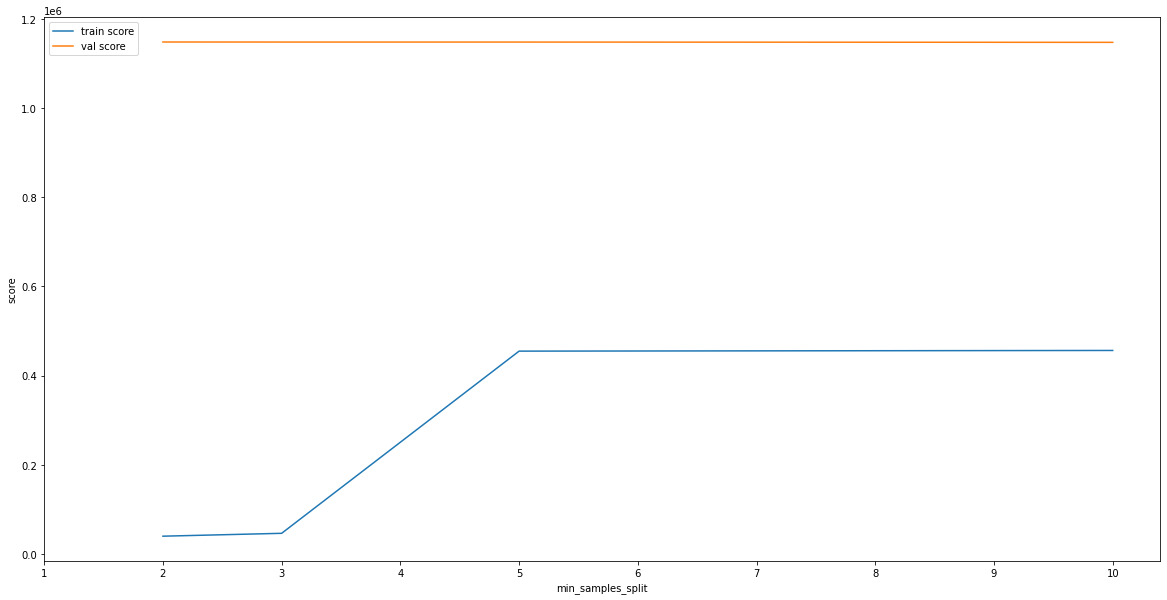

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(min_samples_split_options, train_metrics, label="train score")
plt.plot(min_samples_split_options, val_metrics, label="val score")
plt.xlabel("min_samples_split")
plt.xticks(range(1, 11, 1))
plt.ylabel("score")
plt.legend(loc='best')
plt.show()

Widzimy, że dla parametru `min_samples_split` równym 2 otrzymujemy najniższą (a więc najlepszą) wartość RMSE na zbiorze treningowym. Zmian wartości metryki na zbiorze walidacyjnym nie sposób odczytać na tym wykresie - zmiany te są na tyle małe, że na tej skali wydają się jednakowe. Ustalmy więc wartość tego parametru na 2, wytrenujmy model raz jeszcze na zbiorze treningowym z tą wartością i sprawdźmy wynik uzyskany na zbiorze testowym.

In [20]:
model = DecisionTreeRegressor(min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))

1332204.9289767891


Faktycznie otrzymaliśmy lepszy rezultat niż wcześniej, ale nie jest to do końca nasza zasługa - parametr `min_samples_split` domyślnie przyjmuje wartość 2. Różnica polega na innym podziale zbioru danych - w tym przypadku część danych z poprzedniego zbioru treningowego trafiła do walidacyjnego - być może w ten sposób pozbyliśmy się z danych uczących wartości odstających, więc łatwiej modelowi nauczyć się zależności.

#### Zadanie 5

Przetestuj różne wartosci parametru `min_samples_split` raz jeszcze, tym razem przy użyciu walidacji krzyżowej. Po dobraniu odpowiedniej wartości przetrenuj jeszcze raz model na zbiorze treningowym, a następnie porównaj wartość metryki na zbiorze testowym z poprzednimi rezultatami. Czy wynik jest podobny, czy w obu przypadkach optymalna okazała się ta sama wartość parametru?

In [21]:
from sklearn.model_selection import KFold

In [22]:
def train_model_cv(train_X, train_y, test_X, test_y, k):
    model = DecisionTreeRegressor(min_samples_split=k)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return mean_squared_error(test_y, pred_y, squared=False)

In [23]:
min_samples_split_options = [2, 3, 5, 10]

In [24]:
test_scores = []
for option in min_samples_split_options:
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = []
    for train, test in cv.split(X, y):
        X_train_cv, y_train_cv = X.iloc[train], y.iloc[train]
        X_test_cv, y_test_cv = X.iloc[test], y.iloc[test]
        score.append(train_model_cv(X_train_cv, y_train_cv, X_test_cv, y_test_cv, option))
    test_scores.append(sum(score) / len(score))

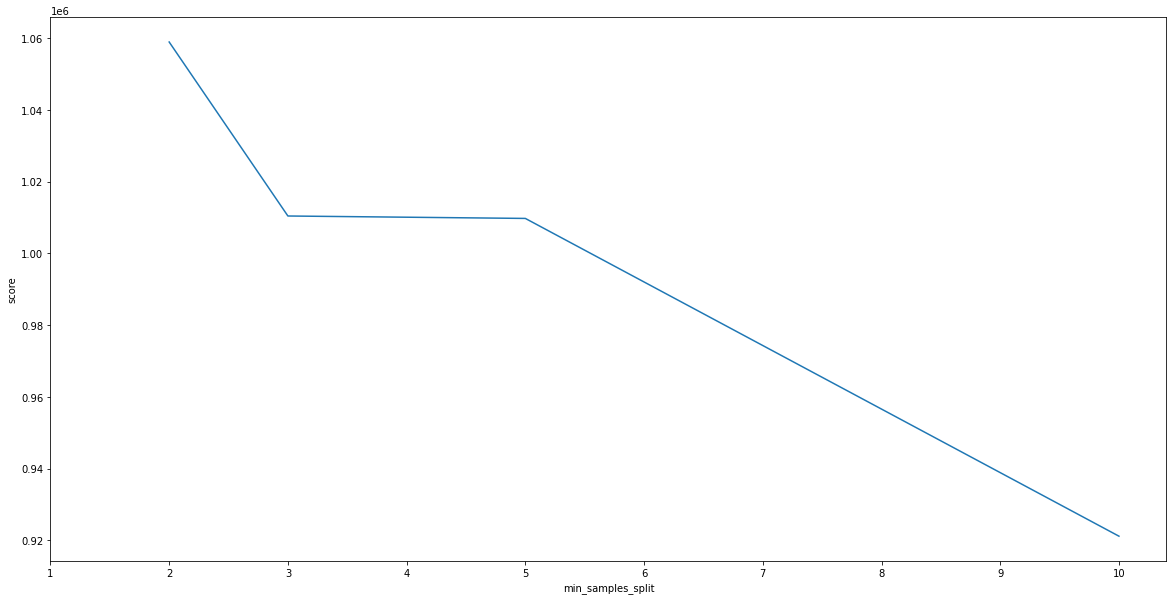

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(min_samples_split_options, test_scores)
plt.xlabel("min_samples_split")
plt.xticks(range(1, 11, 1))
plt.ylabel("score")
plt.show()

Widzimy, że najlepszą wartość uzyskaliśmy dla parametru równego 10, sprawdźmy jak zachowa się model wytrenowanym na zbiorze treningowym z tą wartością i ewaluowany na zbiorze testowym.

In [26]:
model = DecisionTreeRegressor(min_samples_split=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))

1328852.4628279328


Tym razem przy wybieraniu wartości parametru kierowaliśmy się jedynie wartością metryki uzyskaną npodczas walidacji, nie trenowania. Wybraliśmy inną wartość parametru i ona doprowadziła nas do lepszego wyniku na zbiorze testowym.